# Пракитеческий пример сегментации бинаризацией.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg -O coin.jpg

--2022-09-20 15:36:40--  https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg
Распознаётся i.ebayimg.com (i.ebayimg.com)… 151.101.114.206, 2a04:4e42:1b::718
Подключение к i.ebayimg.com (i.ebayimg.com)|151.101.114.206|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 104943 (102K) [image/jpeg]
Сохранение в: «coin.jpg»

coin.jpg            100%[===================>] 102,48K  --.-KB/s    за 0,06s   

2022-09-20 15:36:41 (1,56 MB/s) - «coin.jpg» сохранён [104943/104943]



In [3]:
img = cv2.imread('coin.jpg')

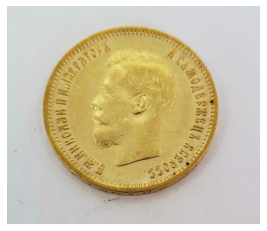

In [4]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.binary)

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Переводим в rgb (opencv Загружает по-умолчанию в bgr)

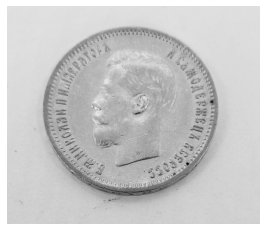

In [6]:
plt.axis('off')
plt.imshow(img_gray, cmap=plt.cm.gray)

Выбираем границу (трешхолд)

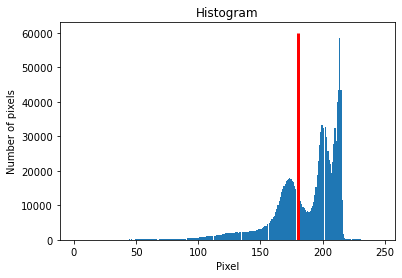

In [7]:
fig, ax = plt.subplots()
ax.hist(img_gray.ravel(), bins=256)
ax.set_title('Histogram')
ax.set_xlabel('Pixel')
ax.set_ylabel('Number of pixels')
ax.vlines(x=180, ymin=0, ymax=6e4, linewidth=3, color='r', linestyle='-')
plt.show()

In [8]:
img_bin = (img_gray > 180)

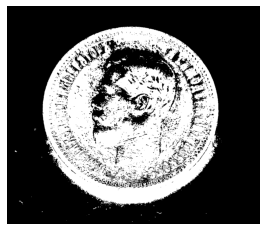

In [9]:
plt.axis('off')
plt.imshow(img_bin, cmap=plt.cm.binary)

## Задание

In [10]:
!wget https://dubllikat.ru/images/price/rus-jir.jpg -O plate.jpg

--2022-09-20 15:36:55--  https://dubllikat.ru/images/price/rus-jir.jpg
Распознаётся dubllikat.ru (dubllikat.ru)… 45.130.41.47
Подключение к dubllikat.ru (dubllikat.ru)|45.130.41.47|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 20449 (20K) [image/jpeg]
Сохранение в: «plate.jpg»

plate.jpg           100%[===================>]  19,97K  --.-KB/s    за 0s      

2022-09-20 15:36:55 (126 MB/s) - «plate.jpg» сохранён [20449/20449]



In [11]:
img = cv2.imread('plate.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)

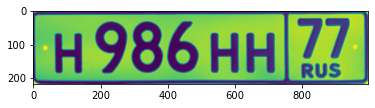

In [12]:
plt.imshow(img_gray)

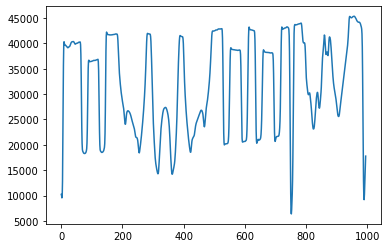

In [13]:
plt.plot(range(img_gray.shape[1]), np.sum(img_gray, axis=0))

In [14]:
(T, threshInv) = cv2.threshold(img_gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)

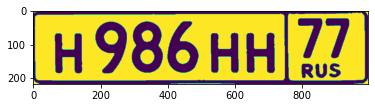

In [15]:
plt.imshow(threshInv)

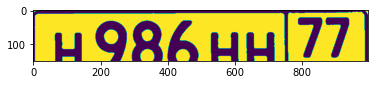

In [16]:
plt.imshow(threshInv[:150, :])

In [17]:
threshInv = threshInv[:150, :]

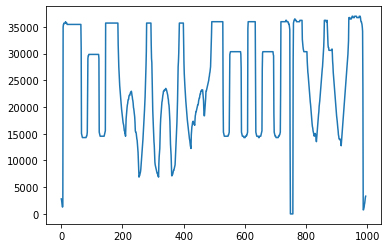

In [18]:
plt.plot(range(threshInv.shape[1]), np.sum(threshInv, axis=0))

In [19]:
x = np.sum(threshInv, axis=0)

In [20]:
from scipy.signal import find_peaks

In [21]:
peaks, _ = find_peaks(x, height=35000, distance=50)

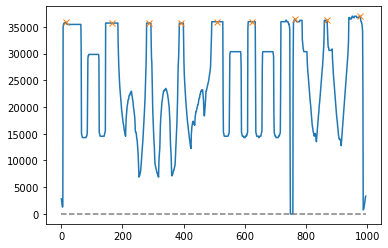

In [22]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

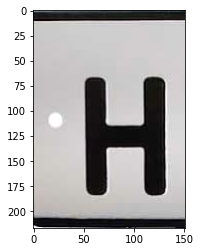

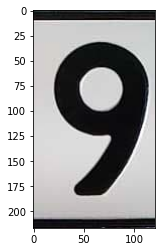

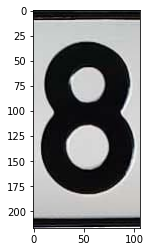

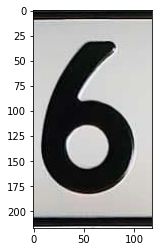

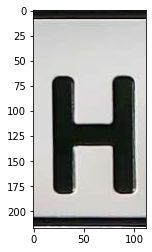

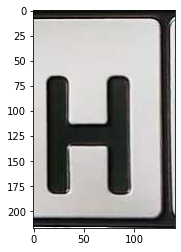

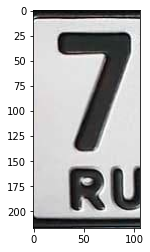

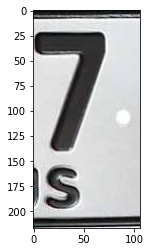

In [23]:
for i in range(len(peaks)-1):
  plt.imshow(img[:, peaks[i]:peaks[i+1]])
  plt.show()